In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from qs import QS

from animation import animate_simple_qs

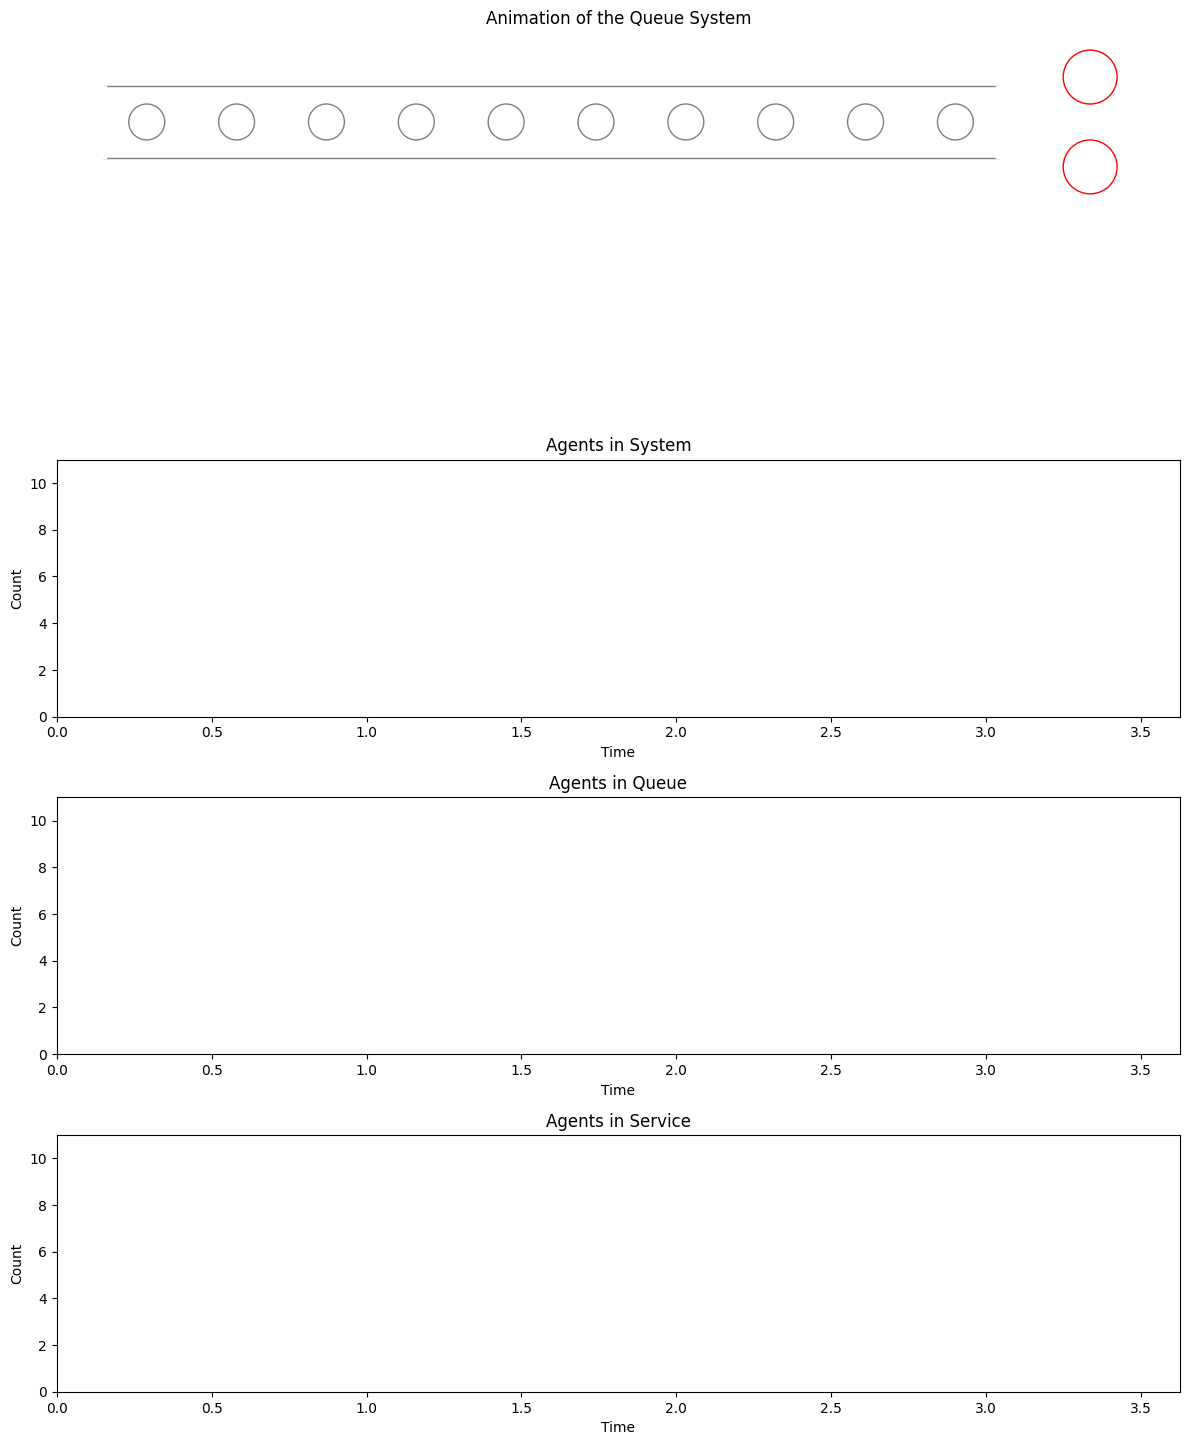

In [3]:
rng = np.random.default_rng(seed=42)

srv_nb = 2

tags_mean_dist = 0.1 # mean distance between incoming tags, in seconds
lambda_a = 1. / tags_mean_dist

test_mean_dist = 1 # mean treatment time for a tag, in seconds (duration of the testsuite)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * srv_nb

arval_dist = lambda size : rng.exponential(1./lambda_a, size=size)
srv_dist = lambda : rng.exponential(1./lambda_t)
queue_size = 10

mm1 = QS(arval_dist, srv_dist, srv_nb, queue_size=queue_size, test_size=20)

mm1.pretreat()

mm1.run()

mm1.posttreat()

animate_simple_qs(mm1, save=True, fps=7)



/home/oscar/afs/ero2/ERO2/animation.py:273: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


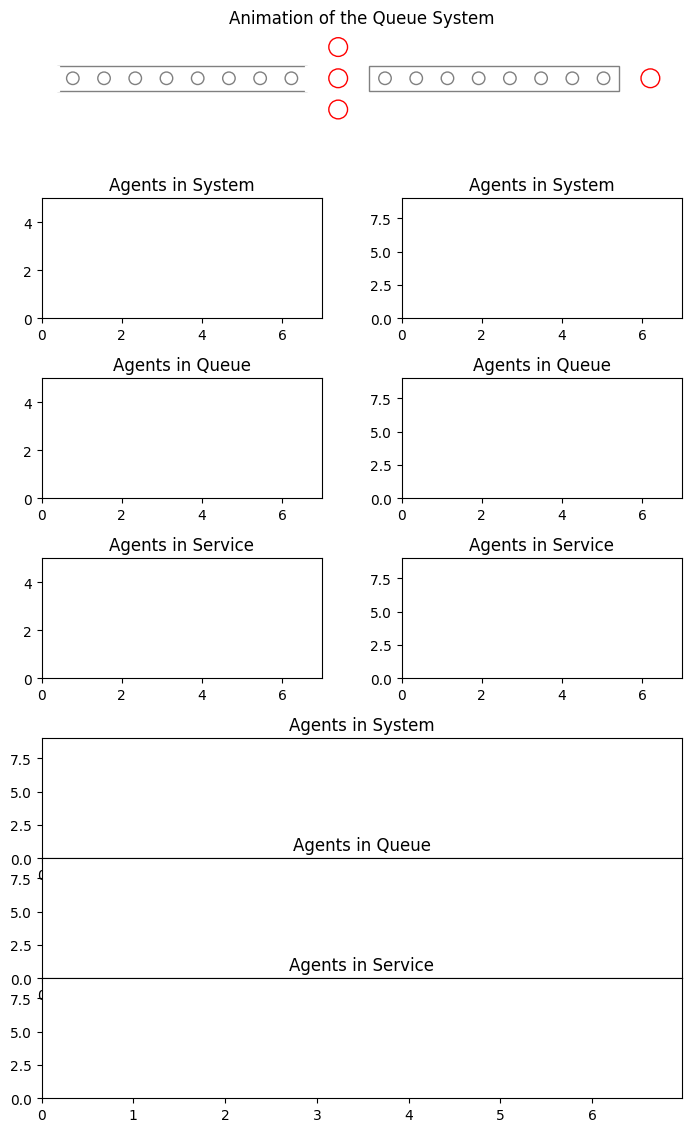

In [1]:
from animation import animate_waterfall
from waterfall import Waterfall

tags_mean_dist = 0.5 # mean distance between incoming tags, in seconds
lambda_a = 1. / tags_mean_dist

k_test = 3 # number of servers in the test queue, i.e. number of tags that can be tested simultaneously
test_mean_dist = 4. # mean treatment time for a tag, in seconds (duration of the testsuite)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * k_test

k_front = 1 # always 1 server
front_mean_dist = 1. # mean time to transfer the result of a tag to the front of the user, in seconds
mu_d = 1. / front_mean_dist
lambda_d = mu_d * k_front

# === Queue sizes === 
q_test_size = 8 # infinite
q_front_size = 8 # infinite

waterfall = Waterfall(
    lambda_a=lambda_a,
    lambda_t=lambda_t,
    lambda_d=lambda_d,
    nb_servers_test=k_test,
    nb_servers_front=k_front,
    q_test_size=q_front_size,
    q_front_size=q_front_size,
    size=10
)

waterfall.run()

waterfall.posttreat()

animate_waterfall(waterfall, save=True, fps=7)